# Python Sentiment Analysis Project with NLTK and 🤗 Transformers.

#### VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
#### Roberta Pretrained Model from 🤗
#### Huggingface Pipeline

# Read in Data and NLTK Basics

- Pandas - Pandas is a powerful Python library for data manipulation and analysis. It provides data structures like DataFrame and Series, which are highly efficient for working with structured data.
- NumPy - NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.
- Matplotlib - Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python. It provides a MATLAB-like interface for creating plots and charts, allowing users to create a wide variety of visualizations.
- Seaborn - Seaborn is a statistical data visualization library built on top of Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn simplifies the process of creating complex visualizations like heatmaps, violin plots, and pair plots.
- NLTK (Natural Language Toolkit) - It's a popular Python library for working with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning. It's widely used in natural language processing (NLP) tasks such as sentiment analysis, text classification, machine translation, and more. In short, nltk is a powerful tool for working with text data in Python.
- plt.style.use('ggplot') - Sets the style of Matplotlib plots to mimic the aesthetics of the "ggplot2" package in R, which is known for producing visually appealing and highly customizable plots. The 'ggplot' style in Matplotlib typically features a gray background, bold lines, and distinctive colors for different elements like data points, axes, and labels. This command allows you to quickly apply this specific style to your Matplotlib plots, giving them a consistent and polished look.

# The Steps in Machine Learning Projects
# AFTERS
- Acquire Data
- Filter Data
- Transform Data
- Explore Data
- Split Data

# 1 Acquire Data or Data Acquisition
1. Extract Data
2. Scrape Data
3. Query Data
4. Collect Data
5. Combine Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

#### Reading Data Set

In [2]:
# Read in data
# Download dataset from here - https://drive.google.com/file/d/1vAR5cPVwAuEhgedQ-Jfb1UdLtETV_1Oh/view?usp=sharing
df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


#### Scanning the data set

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(500, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,500.000,250.500,144.482,1.000,125.750,250.500,375.250,500.000
HelpfulnessNumerator,500.000,0.952,2.046,0.000,0.000,0.000,1.000,19.000
HelpfulnessDenominator,500.000,1.276,2.489,0.000,0.000,0.000,2.000,19.000
Score,500.000,4.316,1.203,1.000,4.000,5.000,5.000,5.000
Time,500.000,1294819603.200,50724372.281,1107820800.000,1267790400.000,1312977600.000,1334620800.000,1351209600.000


In [7]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,500.000,500.000,500.000,500.000,500.000
mean,250.500,0.952,1.276,4.316,1294819603.200
std,144.482,2.046,2.489,1.203,50724372.281
min,1.000,0.000,0.000,1.000,1107820800.000
25%,125.750,0.000,0.000,4.000,1267790400.000
50%,250.500,0.000,0.000,5.000,1312977600.000
75%,375.250,1.000,2.000,5.000,1334620800.000
max,500.000,19.000,19.000,5.000,1351209600.000


# 2 Data Filtering
1. Outliers
2. Error/Noise
3. Duplicates
4. Invalid Data

In [8]:
df.shape

(500, 10)

In [9]:
df.isnull()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False


#### Checking values are missing in the data set

In [10]:
df.isnull().sum()#*100/len(df)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [11]:
df.isnull().sum()*100/len(df)

Id                       0.000
ProductId                0.000
UserId                   0.000
ProfileName              0.000
HelpfulnessNumerator     0.000
HelpfulnessDenominator   0.000
Score                    0.000
Time                     0.000
Summary                  0.000
Text                     0.000
dtype: float64

#### How to detect misssing values

In [12]:
# !pip install missingno

In [13]:
import missingno as mano

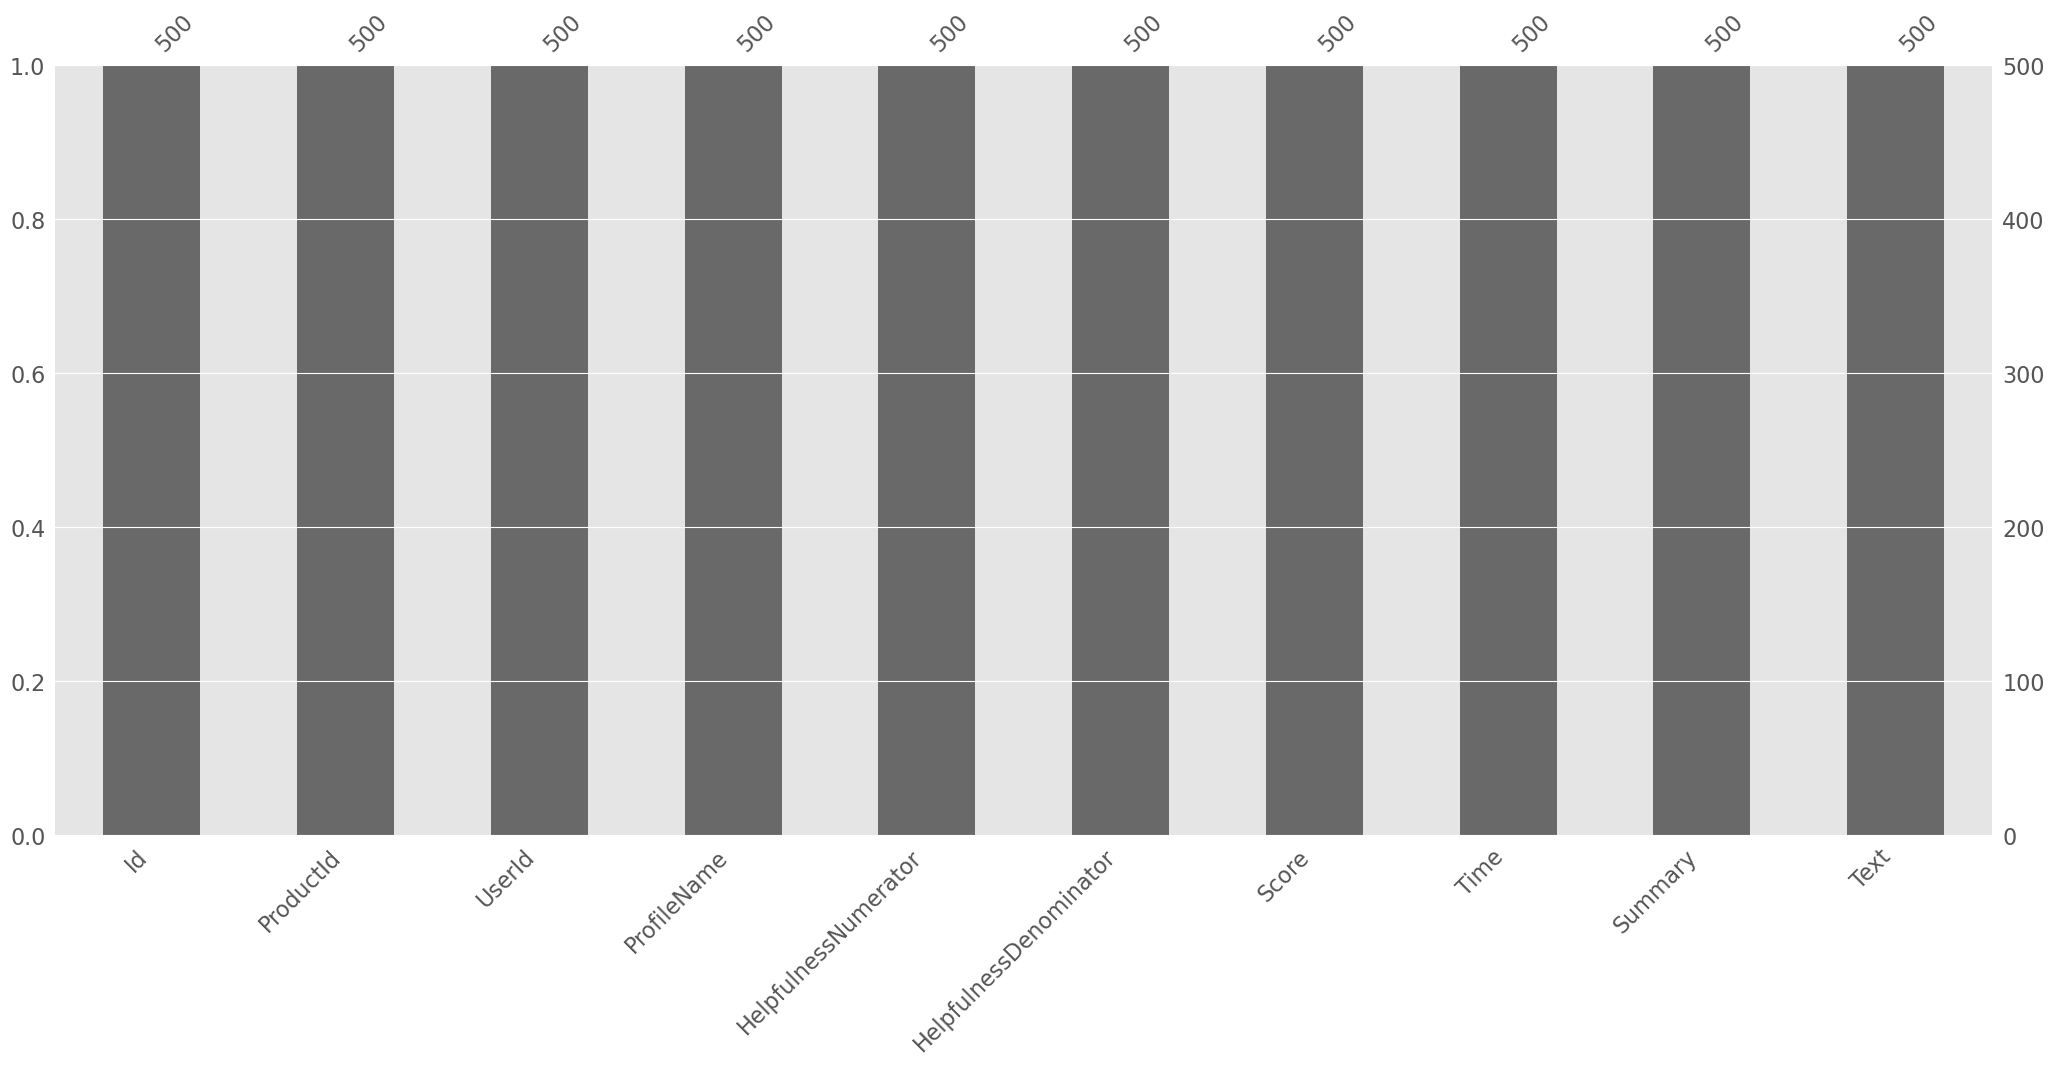

In [14]:
mano.bar(df)
plt.show()

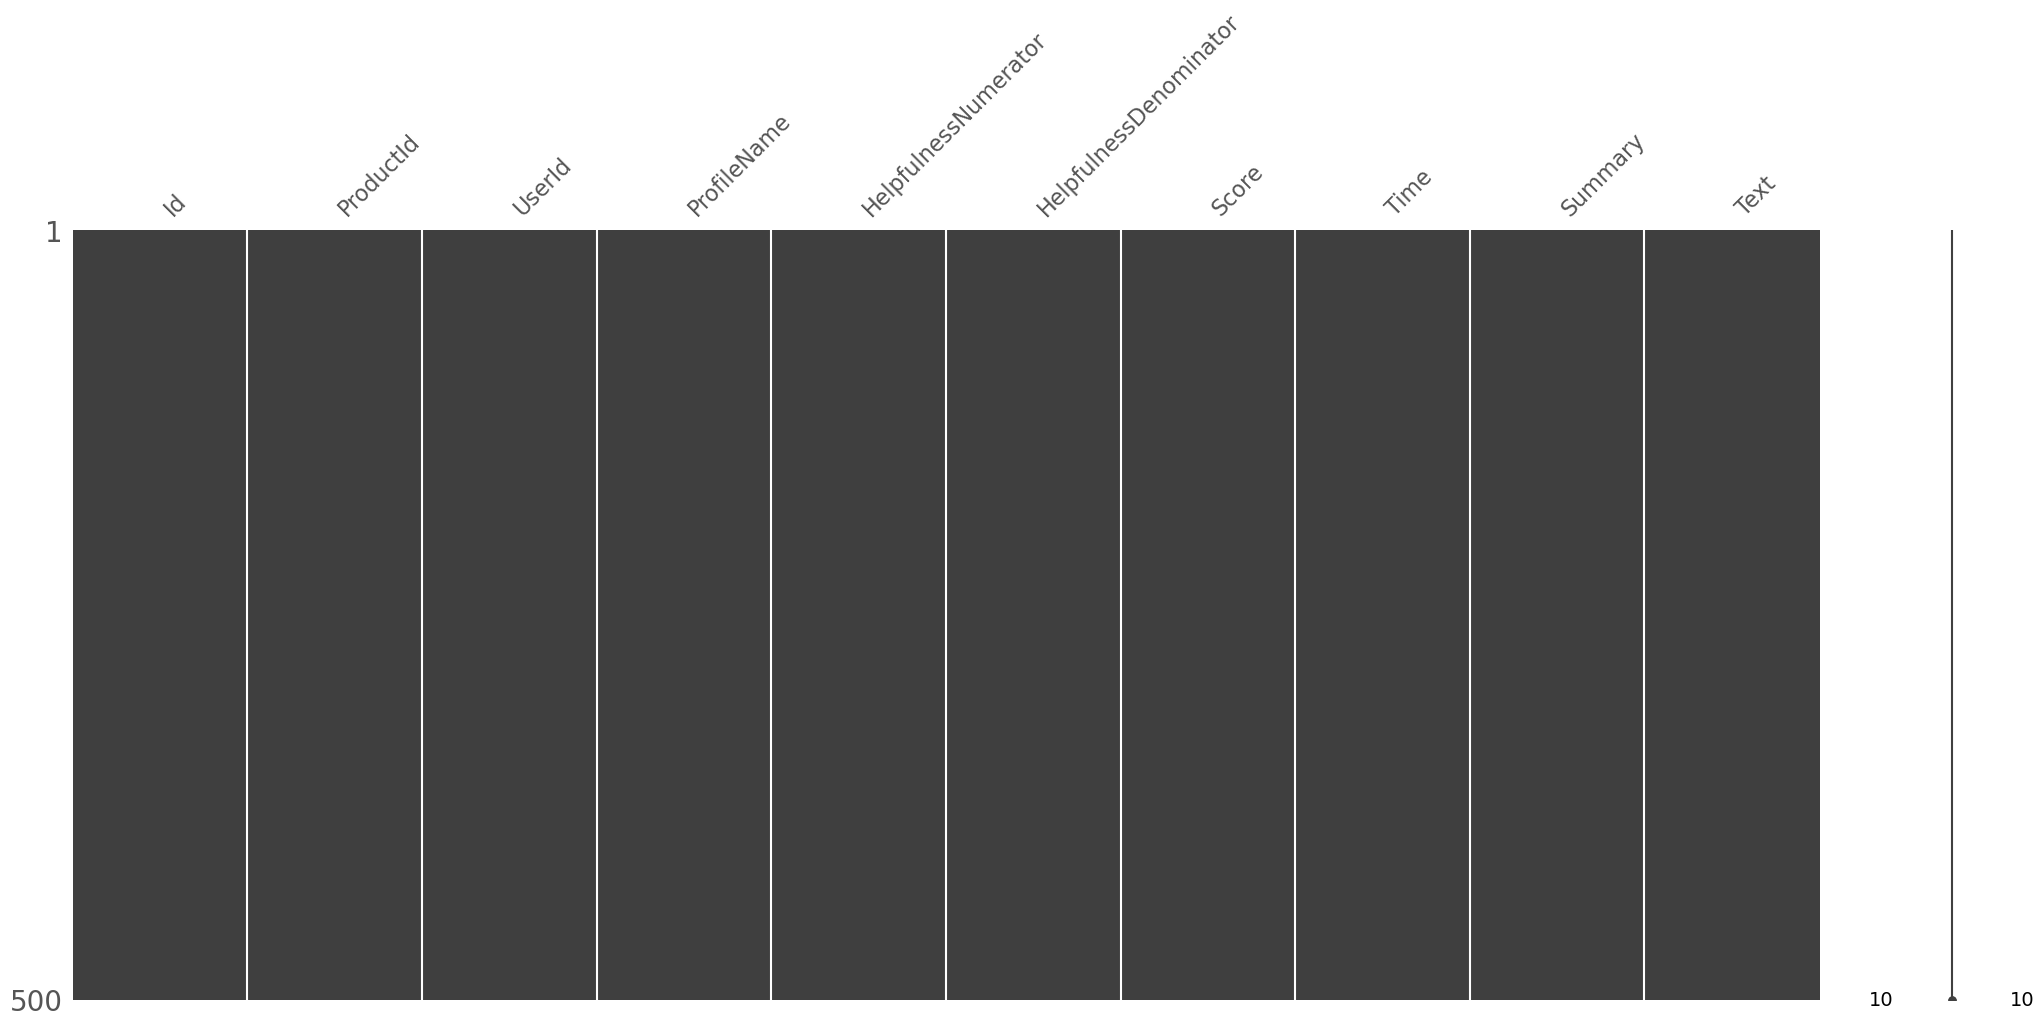

In [15]:
mano.matrix(df)
plt.show()

In [16]:
# Run this code to see the image
import cv2
image = cv2.imread('image.png')
cv2.imshow("Heart Disease Prediction",image)
cv2.waitKey(0)

-1

In [17]:
# In this case the data set has no null values but if there is a column with missing values you can fill it by mean value
# df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
# df['chol'] = df['chol'].fillna(df['chol'].mean())
# df['fbs'] = df['fbs'].fillna(df['fbs'].mean())
# df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
# df['exang'] = df['exang'].fillna(df['exang'].mean())
# df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

#### Checking for duplication

In [18]:
df.duplicated().sum()

0

# 3 Data Transformation
1. Formating
    - Data type conversion
    - Datetime cast
2. Translation Mapping
3. Text to Interger/Float

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


#### Converting Data type object to catergory

In [21]:
# df.info()

In [22]:
# Convert 'column_name' from 'object' to 'category'
# df['ProductId'] = df['ProductId'].astype('category')
# df['UserId'] = df['UserId'].astype('category')
# df['ProfileName'] = df['ProfileName'].astype('category')
# df['Summary'] = df['Summary'].astype('category')
# df['Text'] = df['Text'].astype('category')

In [23]:
# df.info()

#### For learning purpose

#### We can also assign numbers to these categorical data and vise versa ex age numer into [Young, Young Adult, Adult Old]

#### Converting age from numeric to category

In [24]:
# # Extract the 'age' column
# ages = df['age']

# # Define the bin ranges and category labels
# bins = [0, 25, 40, 55, 70, float('inf')]
# labels = ['Young', 'Young adults', 'Adults', 'Middle aged', 'Old']

# # Bin the ages into categories
# age_categories = pd.cut(ages, bins=bins, labels=labels, right=False)

# # Replace the 'age' column with the categorized ages
# df['age'] = age_categories

# print(df)

# 4 Data Exploration

1. Trends
2. Relatioships
3. Anamolies
4. Patterns
5. Uni,Bi Multivariate
6. Hypothesis testing
7. Data Visualization

In [25]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [26]:
df['Score'].value_counts()

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

In [27]:
df.groupby('Score').mean()

C:\Users\psriz\AppData\Local\Temp\ipykernel_23324\4169637139.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Score').mean()


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time
Score,,,,
1,236.306,0.778,2.611,1307527200.000
2,224.667,0.889,1.833,1286001600.000
3,228.838,1.054,1.892,1274621837.838
4,272.771,1.114,1.229,1286488594.286
5,251.145,0.929,1.047,1297863079.646


<Axes: >

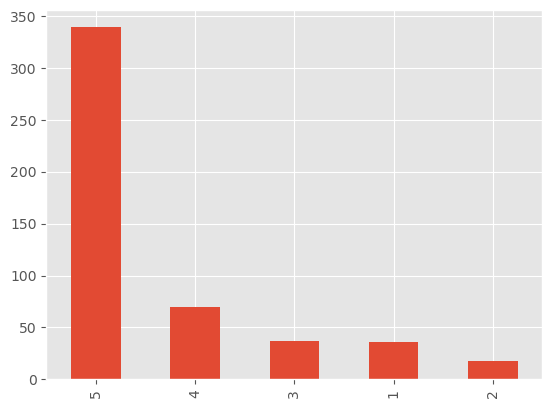

In [28]:
df['Score'].value_counts().plot(kind = 'bar')

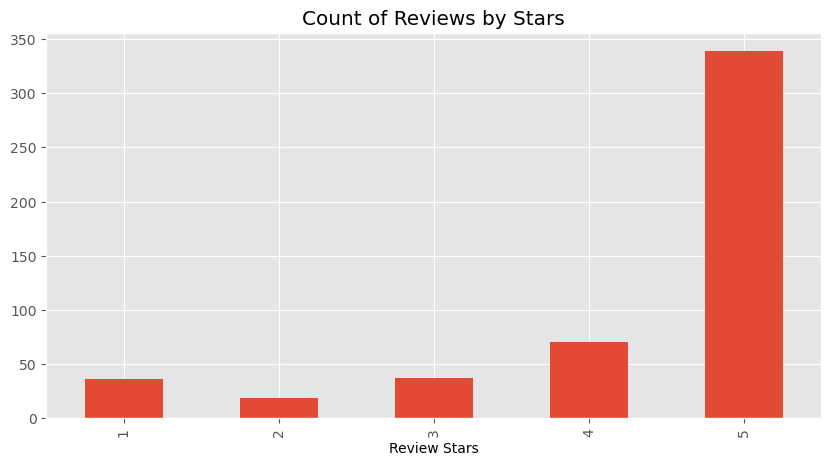

In [29]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

#### Scatter plot of numerical data

<Axes: xlabel='Score', ylabel='Time'>

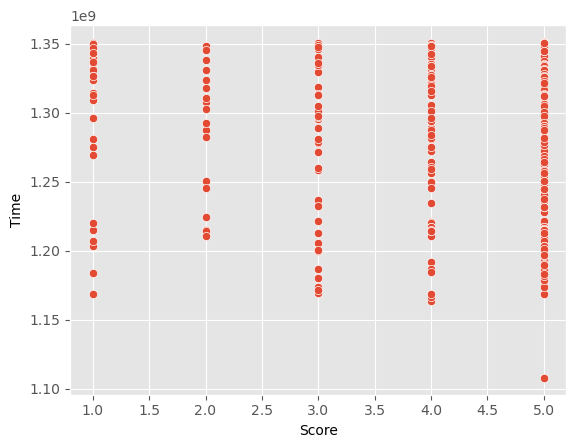

In [30]:
sns.scatterplot(data = df, x= 'Score', y = 'Time')

<Axes: xlabel='Score', ylabel='Time'>

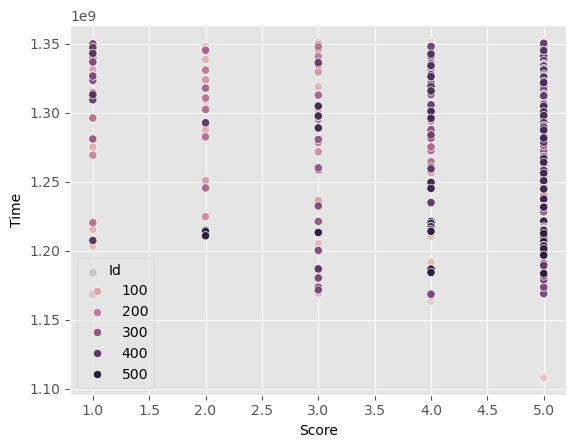

In [31]:
sns.scatterplot(data = df, x= 'Score', y = 'Time', hue = 'Id')

<Axes: xlabel='Score', ylabel='Time'>

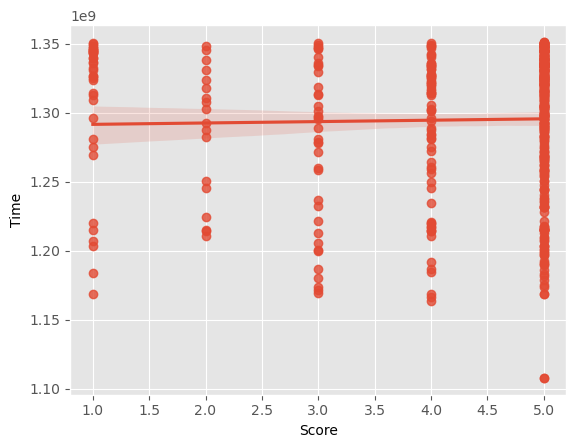

In [32]:
sns.regplot(data = df, x= 'Score', y = 'Time')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


#### Separating Categorical variables

In [34]:
df_cat = df.select_dtypes(include= ['object'])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductId    500 non-null    object
 1   UserId       500 non-null    object
 2   ProfileName  500 non-null    object
 3   Summary      500 non-null    object
 4   Text         500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


#### Sorting categories based on the number of diff categories inside that category

In [35]:
df_cat.nunique().sort_values()

ProductId      136
ProfileName    489
UserId         490
Summary        490
Text           499
dtype: int64

# Basic NLTK

In [36]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [37]:
df['Text']

0      I have bought several of the Vitality canned d...
1      Product arrived labeled as Jumbo Salted Peanut...
2      This is a confection that has been around a fe...
3      If you are looking for the secret ingredient i...
4      Great taffy at a great price.  There was a wid...
                             ...                        
495    i rarely eat chips but i saw these and tried t...
496    This is easily the best potato chip that I hav...
497    Kettle Chips Spicy Thai potato chips have the ...
498    Okay, I should not eat potato chips, nor shoul...
499    I don't write very many reviews but I have to ...
Name: Text, Length: 500, dtype: object

In [38]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [39]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [40]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\psriz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [41]:
tagged = nltk.pos_tag(tokens)
tagged[:10] 

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [42]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# Step 1. VADER Seniment Scoring
- We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
- This uses a "bag of words" approach:
- Stop words are removed. Stop words like and, the which do not have positive or negative feeling. They are just for the structure of the sentence
- each word is scored and combined to a total score.
- Score can be positive, negative, neutral

In [43]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\psriz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

#### Calculating the score for the sentiments in terms of positive, negative, neutral

In [45]:
sia.polarity_scores('I am happy')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [46]:
sia.polarity_scores('I am sad')

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [47]:
sia.polarity_scores('I am batman and i am here to make justice')

{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.5267}

In [48]:
example = df['Text'][50]
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

#### Run the polarity score on the entire dataset

In [49]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [50]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

#### Converting the vaders score to a pandas data frame and merging it with the actual data frame

#### Old data set before merging

In [51]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### New data set after merging

In [52]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [53]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.944,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.566,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.827,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.947,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.973,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.783,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.985,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.128,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [54]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.944,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.566,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.827,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.947,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Plot VADER results

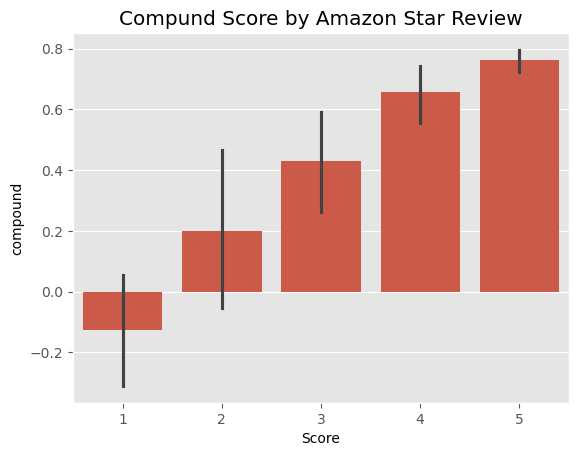

In [55]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

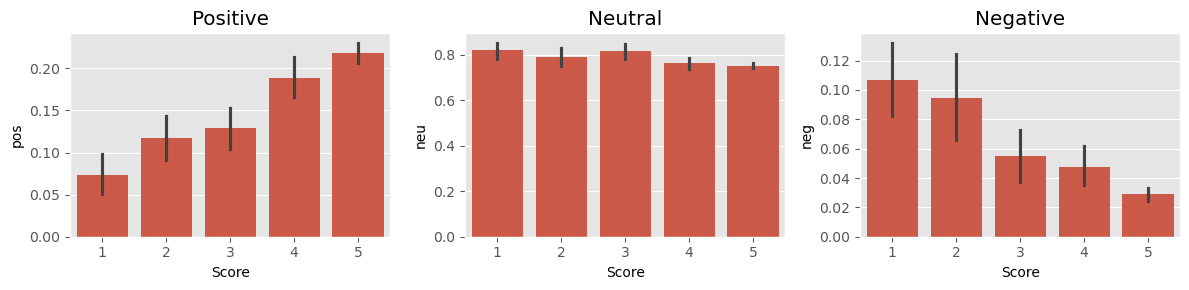

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 2. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [57]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [58]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [59]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [60]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687481, 'roberta_pos': 0.0029573753}


In [61]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [62]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [63]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

#### Compairing columns of original data, vaders and roberto results after merging it with original data frame

In [64]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [65]:
vaders.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [66]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Step 3. Combine and compare

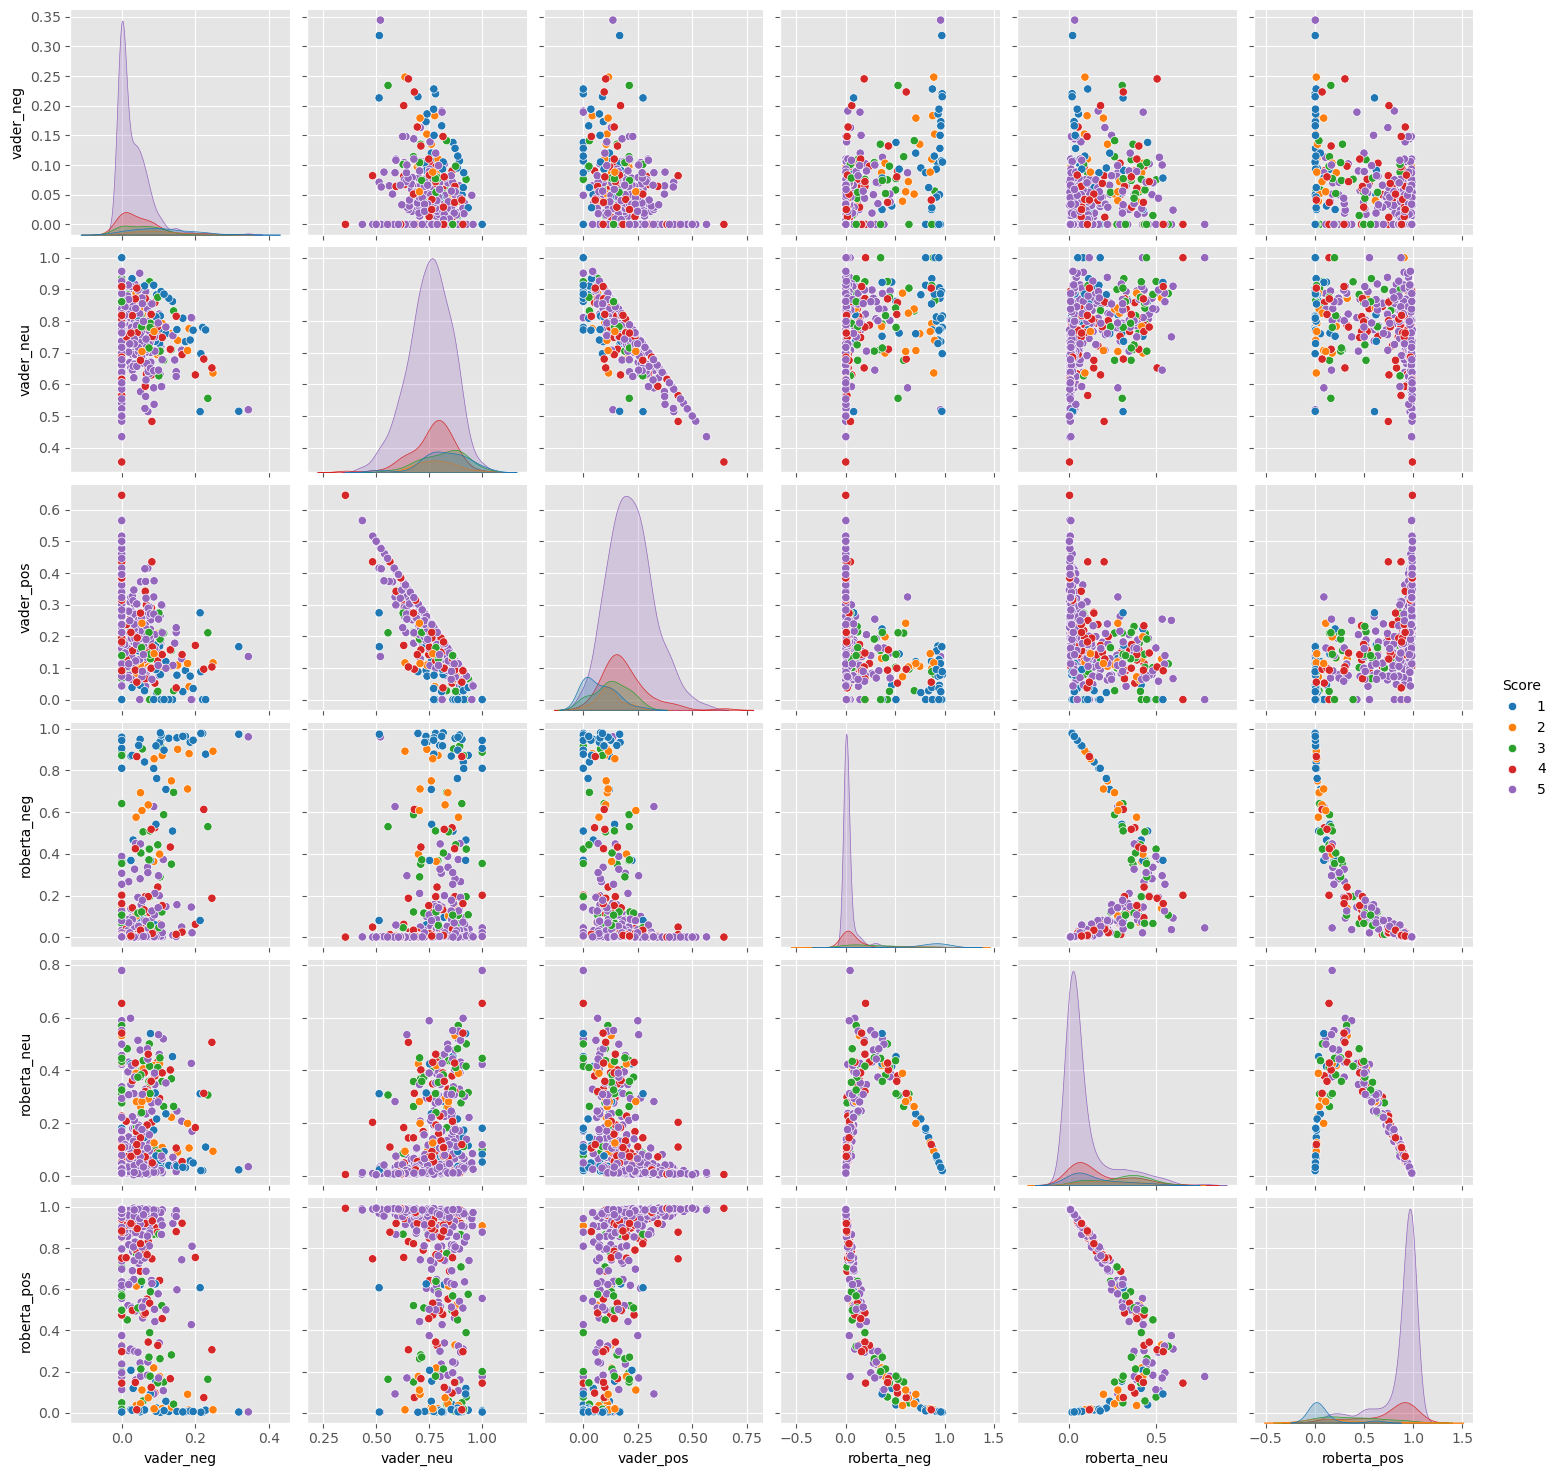

In [67]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Step 4: Review Examples:
# Positive 1-Star and Negative 5-Star Reviews
#### Lets look at some examples where the model scoring and review score differ the most.

In [68]:
results_df.query('Score == 1') \
.sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [69]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

#### Negative sentiment 5-Star view

In [70]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [71]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Extra: The Transformers Pipeline
# Quick & easy way to run sentiment predictions

In [72]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [73]:
sent_pipeline('In the journey of life, obstacles are not roadblocks, but rather stepping stones that refine our essence')

[{'label': 'POSITIVE', 'score': 0.9989205598831177}]

In [74]:
sent_pipeline('I am batman and i am here for justice')

[{'label': 'POSITIVE', 'score': 0.9977778792381287}]

In [75]:
sent_pipeline('I lost someone i loved')

[{'label': 'NEGATIVE', 'score': 0.9980044960975647}]

In [76]:
sent_pipeline('I am depressed')

[{'label': 'NEGATIVE', 'score': 0.9997759461402893}]